In [1]:
# duplicates needs dropping (probably based on headline and summary)

In [10]:
import sys
import os

import pandas as pd
import seaborn as sns

from database import database
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS

import pyLDAvis.gensim_models
import pickle 
import pyLDAvis

from pprint import pprint

import gensim.corpora as corpora

import re

from nltk.stem import WordNetLemmatizer 

In [11]:
news_doc = []
for doc in database.news_collection.find({}):
    news_doc.append(doc)

In [12]:
news_df = pd.DataFrame(news_doc)
news_df.head()

,_id,datetime,headline,image,source,summary,url,api,counterparty,date,keyword_count,sentiment,topic_scores,embedding,category,related,id
0,616a9214d6b0969db79ff387,1634332793,Why Tesla Stock Jumped on Friday,https://s.yimg.com/ny/api/res/1.2/0yhC98wYVUpE...,Yahoo,Shares of electric-car maker Tesla (NASDAQ: TS...,https://finnhub.io/api/news?id=2621e878473ca3c...,Finnhub,TSLA,2021-10-16,{},0,"{'sued': 0.49381569102663736, 'default': 0.573...",NaN,NaN,NaN,NaN
1,616a9214d6b0969db79ff389,1634331480,Tesla earnings preview: Wall Street hopes dark...,https://s.yimg.com/ny/api/res/1.2/EYYlffC3g2Ci...,Yahoo,Wall Street is upbeat about Tesla Inc.'s quart...,https://finnhub.io/api/news?id=e1a9911a9a8c85b...,Finnhub,TSLA,2021-10-16,{'late': 1},0,"{'sued': 0.4662442697740986, 'default': 0.5630...",NaN,NaN,NaN,NaN
2,616a9214d6b0969db79ff38c,1634329980,Tesla stock climbs to 8-month high after Jeffe...,https://s.yimg.com/ny/api/res/1.2/5E2qmFxkEDA8...,Yahoo,Shares of Tesla Inc. extended their recent sur...,https://finnhub.io/api/news?id=9f66dcf48a49beb...,Finnhub,TSLA,2021-10-16,{},1,"{'sued': 0.29466071834709284, 'default': 0.423...",NaN,NaN,NaN,NaN
3,616a9214d6b0969db79ff393,1634315220,Multiple Tesla Model S Plaids Pictured At Nürb...,https://cdn.benzinga.com/files/imagecache/og_i...,Benzinga,Ever since Porsche Automobile Holding SE - ADR...,https://finnhub.io/api/news?id=c0800408d6b7e7c...,Finnhub,TSLA,2021-10-16,{},0,"{'sued': 0.45118694008109717, 'default': 0.535...",NaN,NaN,NaN,NaN
4,616a9214d6b0969db79ff39d,1634296757,Does Tesla Topping Delivery Expectations Affec...,https://static.seekingalpha.com/cdn/s3/uploads...,SeekingAlpha,"Tesla beat market expectations with 241,300 ve...",https://finnhub.io/api/news?id=097e446bddf34ae...,Finnhub,TSLA,2021-10-15,{},-1,NaN,NaN,NaN,NaN,NaN


In [15]:
keywords = ["Ownership change", "Change of control", "Acceleration", "accelerate", "Default", "Insolvency", "Insolvent", "Delay", "Late", "Failure", "fail", "Dispute", "Liquidation", "Liquidator", "Margin call", "Haircut", "Bank run", "Termination", "Moratorium", "Suspension", "Suspend", "Fraud", "misrepresentation", "Fine", "sanction", "Breach", "Reschedule", "Restructuring", "Restructure", "Credit event", "Losses", "Loss", "Bailout", "Bailin", "Bankrupt", "Receivership", "Receiver", "Judicial Management", "Judicial Manager", "Administration", "Administrator", "Sequestrate", "Sequestration", "Support", "Capital call", "Liquidity event", "Negative trends", "Price changes", "Board infighting", "Corruption", "Inappropriate or ultra vires dealings", "Negative working capital", "Acquisition", "LBO", "Qualified audit opinion", "Regulatory breach", "Non-performing assets", "Provisions", "Force majeur", "Distress", "Frozen", "Delisted", "Sued", "Suit", "Arrested", "Disappeared", "Uncontactable"]

def keywords_in_news (news_df):
    
    for i in range(len(news_df["summary"])):
        news_str = news_df["summary"][i].lower()
        for keyword in keywords:
            keyword = keyword.lower()
            if keyword in news_str:
                news_df["keyword_count"][i][keyword] = news_df["keyword_count"][i].get(keyword, 0) + 1
        
    return news_df

news_df = keywords_in_news(news_df)

NameError: name 'keywords_count_dict' is not defined

In [17]:
from nltk.corpus import wordnet
keywords = ["Ownership change", "Change of control", "Acceleration", "accelerate", "Default", "Insolvency", "Insolvent", "Delay", "Late", "Failure", "fail", "Dispute", "Liquidation", "Liquidator", "Margin call", "Haircut", "Bank run", "Termination", "Moratorium", "Suspension", "Suspend", "Fraud", "misrepresentation", "Fine", "sanction", "Breach", "Reschedule", "Restructuring", "Restructure", "Credit event", "Losses", "Loss", "Bailout", "Bailin", "Bankrupt", "Receivership", "Receiver", "Judicial Management", "Judicial Manager", "Administration", "Administrator", "Sequestrate", "Sequestration", "Support", "Capital call", "Liquidity event", "Negative trends", "Price changes", "Board infighting", "Corruption", "Inappropriate or ultra vires dealings", "Negative working capital", "Acquisition", "LBO", "Qualified audit opinion", "Regulatory breach", "Non-performing assets", "Provisions", "Force majeur", "Distress", "Frozen", "Delisted", "Sued", "Suit", "Arrested", "Disappeared", "Uncontactable"]

def synonym_keywords (keywords):
    

def keywords_in_news (news_df):
    keywords_count_dict = {}
    for i in range(len(news_df["summary"])):
        news = news_df["summary"][i].lower()
        for keyword in keywords:
            keyword = keyword.lower()
            synonyms = set()
            for syn in wordnet.synsets(keyword):
                for l in syn.lemmas():
                    synonyms.add(l.name())
            for keyword_synonym in synonyms:
                if keyword_synonym in news:
                    keywords_count_dict[keyword] = keywords_count_dict.get(keyword, 0) + 1
                
    return keywords_count_dict
        

news_df = keywords_in_news(news_df)

In [18]:
news_df

{'arrested': 48129,
 'late': 49016,
 'provisions': 7045,
 'delay': 26410,
 'support': 54102,
 'termination': 26327,
 'fine': 49388,
 'fail': 55560,
 'administrator': 5616,
 'losses': 51947,
 'loss': 49934,
 'sued': 12496,
 'suit': 27172,
 'administration': 9356,
 'accelerate': 2550,
 'dispute': 3661,
 'breach': 8677,
 'frozen': 6222,
 'suspension': 8469,
 'bankrupt': 6887,
 'failure': 1578,
 'sanction': 4555,
 'sequestrate': 363,
 'default': 369,
 'acquisition': 3906,
 'disappeared': 318,
 'distress': 1099,
 'fraud': 797,
 'suspend': 901,
 'moratorium': 34,
 'liquidation': 454,
 'liquidator': 24,
 'receiver': 179,
 'insolvent': 204,
 'acceleration': 184,
 'delisted': 200,
 'haircut': 27,
 'sequestration': 3,
 'restructuring': 46,
 'restructure': 46,
 'reschedule': 9,
 'corruption': 41,
 'misrepresentation': 10,
 'insolvency': 3,
 'receivership': 1}

In [6]:
keywords = ["Ownership change", "Change of control", "Acceleration", "accelerate", "Default", "Insolvency", "Insolvent", "Delay", "Late", "Failure", "fail", "Dispute", "Liquidation", "Liquidator", "Margin call", "Haircut", "Bank run", "Termination", "Moratorium", "Suspension", "Suspend", "Fraud", "misrepresentation", "Fine", "sanction", "Breach", "Reschedule", "Restructuring", "Restructure", "Credit event", "Losses", "Loss", "Bailout", "Bailin", "Bankrupt", "Receivership", "Receiver", "Judicial Management", "Judicial Manager", "Administration", "Administrator", "Sequestrate", "Sequestration", "Support", "Capital call", "Liquidity event", "Negative trends", "Price changes", "Board infighting", "Corruption", "Inappropriate or ultra vires dealings", "Negative working capital", "Acquisition", "LBO", "Qualified audit opinion", "Regulatory breach", "Non-performing assets", "Provisions", "Force majeur", "Distress", "Frozen", "Delisted", "Sued", "Suit", "Arrested", "Disappeared", "Uncontactable"]

def keyword_count (news):
    
    keywords_count_dict = {}
    
    for keyword in keywords:
        keyword = keyword.lower()
        for news_str in news:
            news_str = news_str.lower()
            if keyword in news_str:
                keywords_count_dict[keyword] = keywords_count_dict.get(keyword, 0) + 1
    
    return keywords_count_dict

def plot_keyword_frequency (news_keyword_frequency):
    news_list = news_keyword_frequency.items()
#     print(news_list)
#     news_list = sorted(news_list) 
    x, y = zip(*news_list) 

    plt.rcParams["figure.figsize"] = (20,3)
    plt.plot(x, y)
    plt.xticks(rotation='vertical')
    plt.show()
    
def keyword_wordcloud (text_string):
    wordcloud = WordCloud().generate(text_string)

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

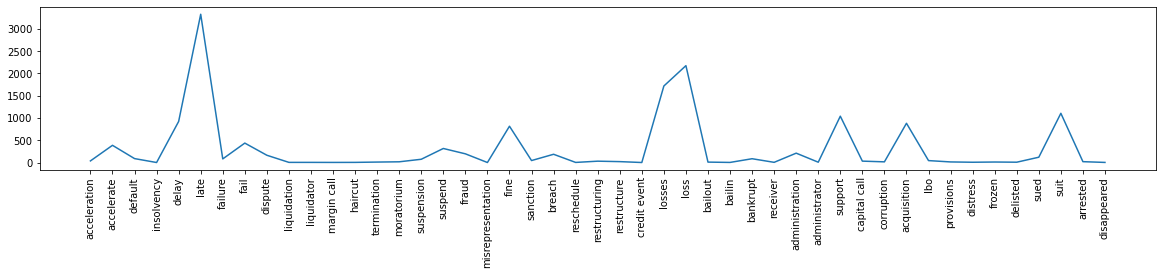

In [7]:
headline_keyword_frequency = keyword_count(news_df.headline)
plot_keyword_frequency(headline_keyword_frequency)

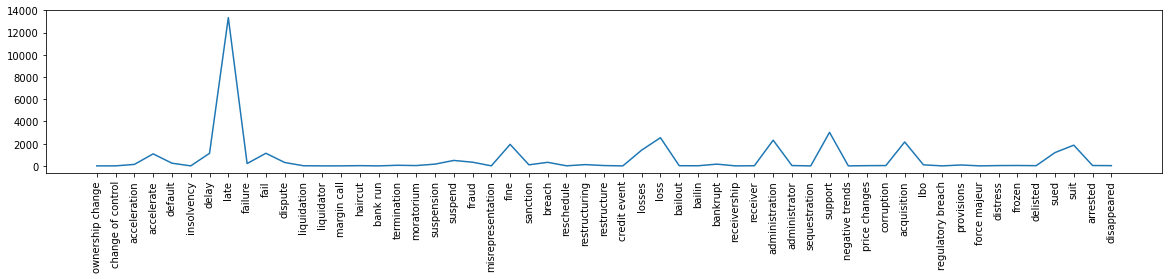

In [8]:
summary_keyword_frequency = keyword_count(news_df.summary)
plot_keyword_frequency(summary_keyword_frequency)

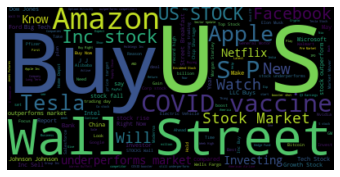

In [9]:
headline_text = " ".join(headline for headline in news_df.headline)
keyword_wordcloud(headline_text)

In [10]:
def counterparty_keyword_count (news_counterparty, target_counterparty: str):
    keywords_count_dict = {}
    
    target_news_headline = news_counterparty.loc[news_counterparty["counterparty"]==target_counterparty, "headline"]
    target_news_summary = news_counterparty.loc[news_counterparty["counterparty"]==target_counterparty, "summary"]


    for keyword in keywords:
        keyword = keyword.lower()
        for news_str in target_news_summary:
            news_str = news_str.lower()
            if keyword in news_str:
                keywords_count_dict[keyword] = keywords_count_dict.get(keyword, 0) + 1
    
    return keywords_count_dict

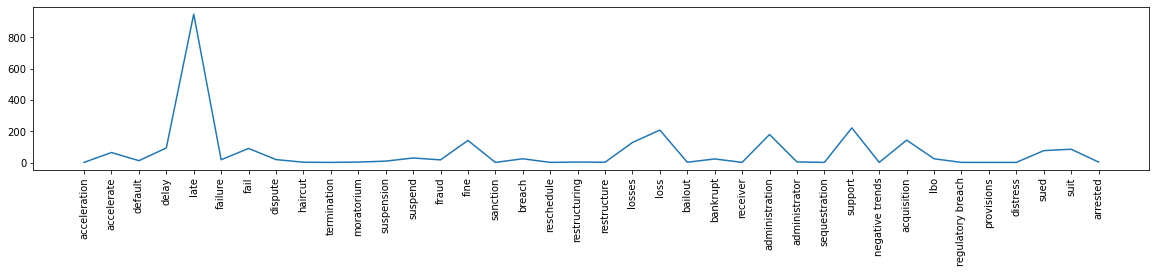

In [11]:
# graph for TSLA
plot_keyword_frequency(counterparty_keyword_count (news_df, 'TSLA'))

In [12]:
def counterparty_keyword_date_occurance (news_counterparty, target_counterparty: str, target_keyword: str):
    keywords_count_dict = {}
    keyword_count = 0
    
    target_news = news_counterparty.loc[news_counterparty["counterparty"]==target_counterparty]
    target_news = target_news[target_news['summary'].str.contains(target_keyword)]
    
    '''
    select a keyword
    check its frequency as we move along the x-axis
    see when what keyword appears
    connect with the frontend to make it interactive
    '''

    for date in target_news['date']:
        keywords_count_dict[date] = keywords_count_dict.get(date, 0) + 1
        
    return keywords_count_dict

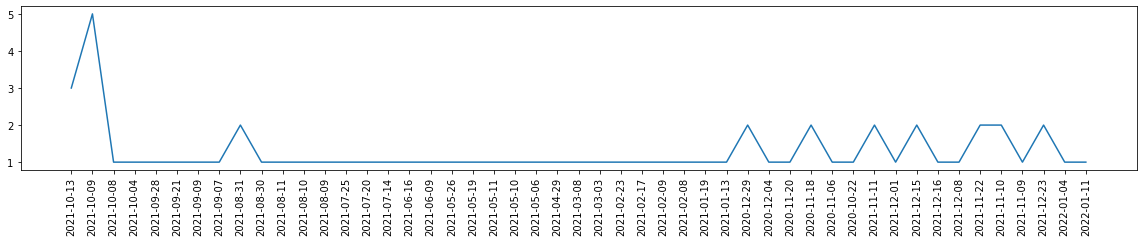

In [13]:
plot_keyword_frequency(counterparty_keyword_date_occurance (news_df, 'TSLA', 'accelerate'))

In [14]:
papers = news_df
papers.head()

,_id,datetime,headline,image,source,summary,url,api,counterparty,date,keyword_count,sentiment,category,related,id
0,616a9214d6b0969db79ff380,1634342006,"Dow Jones Futures: Microsoft, Tesla Rival Xpen...",https://s.yimg.com/uu/api/res/1.2/8E9xXtahKzzU...,Yahoo,"With a confirmed market rally, how aggressive ...",https://finnhub.io/api/news?id=0a71ef5127fb093...,Finnhub,TSLA,2021-10-16,{},0,NaN,NaN,NaN
1,616a9214d6b0969db79ff381,1634345700,Tesla Will Probably Beat Earnings Estimates. W...,https://s.yimg.com/ny/api/res/1.2/Gc1PiHZWDkam...,Yahoo,Tesla will easily beat earnings expectations ...,https://finnhub.io/api/news?id=b21fa618c07df48...,Finnhub,TSLA,2021-10-16,{},-1,NaN,NaN,NaN
2,616a9214d6b0969db79ff382,1634342280,Musk Trolls Bezos Over Wealth. He Could have T...,https://s.yimg.com/ny/api/res/1.2/eLHfCjFR8LCr...,Yahoo,"In a tweet, the Tesla CEO drew attention to hi...",https://finnhub.io/api/news?id=e94ea5b855e79f8...,Finnhub,TSLA,2021-10-16,{},-1,NaN,NaN,NaN
3,616a9214d6b0969db79ff383,1634335078,'Big Short' investor Burry says he's no longer...,https://s.yimg.com/uu/api/res/1.2/BnJkedCmxSup...,Yahoo,Burry's Scion Asset Management said in a regul...,https://finnhub.io/api/news?id=d162aec79de9fdb...,Finnhub,TSLA,2021-10-16,{},1,NaN,NaN,NaN
4,616a9214d6b0969db79ff385,1634334249,Into the Heart of Q3 Earnings Season,https://s.yimg.com/uu/api/res/1.2/Dbt0ApA69Vv9...,Yahoo,The big banks got us off to a flying start in ...,https://finnhub.io/api/news?id=f453ec3b3fffc3e...,Finnhub,TSLA,2021-10-16,{},1,NaN,NaN,NaN


In [15]:
papers = papers.drop(columns=['_id', 'url', 'image', 'source', 'api'], axis=1).sample(100)
papers.reset_index(drop=True, inplace=True)
papers.head()

,datetime,headline,summary,counterparty,date,keyword_count,sentiment,category,related,id
0,1606515457,Tesla could widen release of 'self-driving' so...,Tesla Inc Chief Executive Officer Elon Musk sa...,TSLA,2020-11-28,{},0,NaN,NaN,NaN
1,1637246114,"ARKQ: Despite A Ton Of Tesla, The ETF Is A Lag...",The ARK Autonomous & Robotics ETF has an 11.7%...,F,2021-11-18,{},-1,NaN,NaN,NaN
2,1605006640,Delta Stock Is Soaring But There Could Be Turb...,"InvestorPlace - Stock Market News, Stock Advic...",AAL,2020-11-10,{},1,NaN,NaN,NaN
3,1619352480,JetBlue and American Airlines Add Routes as Al...,"Last July, American Airlines (NASDAQ: AAL) and...",AAL,2021-04-25,{},0,NaN,NaN,NaN
4,1631008558,Intel At The Crossroads,Intel's IFS will become an important opportuni...,TSM,2021-09-07,{},-1,NaN,NaN,NaN


In [16]:
papers['headline'] = papers['summary'].map(lambda x: re.sub('[,\.!?]', '', x))
papers['headline'] = papers['headline'].map(lambda x: x.lower())

papers['headline'].head()

<>:1: DeprecationWarning: invalid escape sequence \.
<>:1: DeprecationWarning: invalid escape sequence \.
/var/folders/8l/jn81tp550kgg0g40m3mj5g980000gn/T/ipykernel_31025/3248346853.py:1: DeprecationWarning: invalid escape sequence \.
  papers['headline'] = papers['summary'].map(lambda x: re.sub('[,\.!?]', '', x))


0    tesla inc chief executive officer elon musk sa...
1    the ark autonomous & robotics etf has an 117% ...
2    investorplace - stock market news stock advice...
3    last july american airlines (nasdaq: aal) and ...
4    intel's ifs will become an important opportuni...
Name: headline, dtype: object

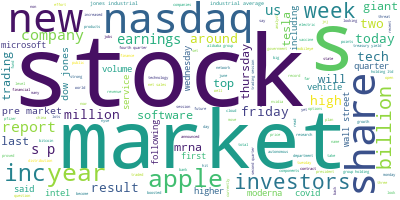

In [17]:
# Join the different processed headlines together.
long_string = ','.join(list(papers['headline'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

wordcloud.generate(long_string)
wordcloud.to_image()

In [18]:
import gensim
from gensim.utils import simple_preprocess
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
# stop_words.extend(['from', 'subject', 're', 'edu', 'use'])


def lemmatize (sentence):
    lemmatizer = WordNetLemmatizer()
    nltk.download('punkt')
    
    # Tokenize: Split the sentence into words
    word_list = nltk.word_tokenize(sentence)
    
    # Lemmatize list of words and join
    lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
    print(lemmatized_output)
    #> The striped bat are hanging on their foot for best
    
    return lemmatized_output

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
def remove_stopwords(texts):
    refined_doc = []
    
    for doc in texts:
        refined_text = []
        for word in simple_preprocess(str(doc)):
            if word not in stop_words and len(word) > 4:
                refined_text.append(word)
        refined_doc.append(refined_text)
        
    return refined_doc
                
#     return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

data = papers.headline.values.tolist()

# still lemmatizing
# data = lemmatize(data)
data_words = list(sent_to_words(data))


# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:][0][:30])

['tesla', 'chief', 'executive', 'officer', 'friday', 'probably', 'wider', 'driving', 'software', 'update', 'weeks']


In [19]:
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1)]


In [20]:
num_topics = 50

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(5,
  '0.049*"bloomberg" + 0.049*"airways" + 0.049*"exploring" + 0.049*"republic" '
  '+ 0.001*"raising" + 0.001*"owners" + 0.001*"search" + 0.001*"running" + '
  '0.001*"texas" + 0.001*"operation"'),
 (46,
  '0.040*"intel" + 0.039*"cloud" + 0.020*"biggest" + 0.020*"market" + '
  '0.020*"become" + 0.020*"moving" + 0.020*"important" + 0.020*"forward" + '
  '0.020*"erosion" + 0.020*"windows"'),
 (27,
  '0.033*"standing" + 0.033*"batteries" + 0.033*"world" + 0.033*"future" + '
  '0.033*"betting" + 0.033*"money" + 0.033*"makers" + 0.033*"vehicle" + '
  '0.033*"problem" + 0.033*"except"'),
 (3,
  '0.044*"billion" + 0.039*"quarter" + 0.032*"nasdaq" + 0.026*"sales" + '
  '0.022*"increased" + 0.022*"since" + 0.022*"topped" + 0.022*"yields" + '
  '0.022*"stocks" + 0.022*"level"'),
 (40,
  '0.033*"antibodies" + 0.033*"moderna" + 0.033*"would" + 0.017*"robotics" + '
  '0.017*"company" + 0.017*"younger" + 0.017*"early" + 0.017*"announcing" + '
  '0.017*"increased" + 0.017*"seasonal"'),
 (21,
  '0

In [21]:
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds='mmds')
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
        
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

/Users/poswalabhishek/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(
/Users/poswalabhishek/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/poswalabhishek/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/poswalabhishek/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
25     0.313321  0.141553       1        1  5.198872
22     0.060803 -0.273704       2        1  4.738624
44    -0.023213 -0.344598       3        1  4.646754
31    -0.251210 -0.183641       4        1  4.153492
4      0.162452 -0.293468       5        1  4.109072
14     0.300505 -0.110618       6        1  4.092857
33    -0.303341 -0.101710       7        1  3.864425
28     0.253997 -0.222679       8        1  3.572646
9      0.004118  0.283838       9        1  3.411707
13     0.304342 -0.008655      10        1  3.334971
40    -0.168076 -0.265327      11        1  3.263658
21    -0.318678  0.078745      12        1  3.069679
12    -0.256842  0.011690      13        1  3.003151
24     0.085695  0.272493      14        1  2.891062
17    -0.185100 -0.017075      15        1  2.669613
15    -0.145639  0.293459      16        1  2.604054
39    -0.233533  0.175546      17        1  2.440297
2      0.200322  0.221046      18        1  2.372522
6     -0.211774 -0.102587      19        1  2.225068
26     0.174376 -0.161426      20        1  2.224788
46    -0.074484 -0.253663      21        1  2.150465
37     0.077104 -0.016736      22        1  2.069226
34     0.140458 -0.082440      23        1  1.698334
35    -0.058212 -0.158268      24        1  1.698334
38    -0.058213  0.185092      25        1  1.650113
18     0.047359 -0.178464      26        1  1.624187
30    -0.158355  0.062314      27        1  1.487787
48     0.010960  0.200838      28        1  1.413847
47    -0.122287 -0.114765      29        1  1.357627
45    -0.133400  0.179685      30        1  1.341321
10    -0.155035  0.118883      31        1  1.339961
19     0.101300  0.207354      32        1  1.253709
43     0.154153 -0.016685      33        1  1.118292
8      0.056590 -0.081178      34        1  1.105703
27     0.102938  0.124403      35        1  1.105703
3      0.237523  0.067490      36        1  1.105703
0      0.039681  0.120533      37        1  0.957877
20    -0.119067 -0.030969      38        1  0.957877
36     0.159288  0.075396      39        1  0.957877
49    -0.054597  0.111384      40        1  0.884059
42    -0.006788  0.088218      41        1  0.884059
32     0.124521  0.015543      42        1  0.884059
16    -0.057947  0.036679      43        1  0.663240
29     0.006835 -0.037019      44        1  0.663240
1     -0.015514 -0.102759      45        1  0.589978
5     -0.015433  0.002451      46        1  0.372667
11    -0.024486  0.023419      47        1  0.372667
41    -0.001265  0.016848      48        1  0.134926
23     0.035113  0.026686      49        1  0.134926
7     -0.001266  0.016848      50        1  0.134926, topic_info=         Term       Freq      Total Category  logprob  loglift
23      stock  14.000000  14.000000  Default  30.0000  30.0000
22     market  16.000000  16.000000  Default  29.0000  29.0000
57      apple   7.000000   7.000000  Default  28.0000  28.0000
38     nasdaq  11.000000  11.000000  Default  27.0000  27.0000
77    billion   6.000000   6.000000  Default  26.0000  26.0000
..        ...        ...        ...      ...      ...      ...
25   airlines   0.002162   1.714398  Topic50  -6.7334  -0.0676
26    airways   0.002162   1.377137  Topic50  -6.7334   0.1515
27      allia   0.002162   1.136057  Topic50  -6.7334   0.3439
28   american   0.002162   1.648659  Topic50  -6.7334  -0.0285
29  announced   0.002162   3.063619  Topic50  -6.7334  -0.6481

[2037 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
141       4  0.736427   abortion
667       7  0.783068  abundance
537       8  0.848318     access
571       5  0.549642  according
142       4  0.747778    accused
...     ...       ...        ...
334       1  0.418464     yields
334      20  0.418464     yields
717      11  0.781091    younger
838      15  0.703941      zacks
829       3

In [22]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition
import matplotlib.pyplot as plt
import numpy as np
import re
import nltk
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/poswalabhishek/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
news_df

,_id,datetime,headline,image,source,summary,url,api,counterparty,date,keyword_count,sentiment,category,related,id
0,616a9214d6b0969db79ff380,1634342006,"Dow Jones Futures: Microsoft, Tesla Rival Xpen...",https://s.yimg.com/uu/api/res/1.2/8E9xXtahKzzU...,Yahoo,"With a confirmed market rally, how aggressive ...",https://finnhub.io/api/news?id=0a71ef5127fb093...,Finnhub,TSLA,2021-10-16,{},0,NaN,NaN,NaN
1,616a9214d6b0969db79ff381,1634345700,Tesla Will Probably Beat Earnings Estimates. W...,https://s.yimg.com/ny/api/res/1.2/Gc1PiHZWDkam...,Yahoo,Tesla will easily beat earnings expectations ...,https://finnhub.io/api/news?id=b21fa618c07df48...,Finnhub,TSLA,2021-10-16,{},-1,NaN,NaN,NaN
2,616a9214d6b0969db79ff382,1634342280,Musk Trolls Bezos Over Wealth. He Could have T...,https://s.yimg.com/ny/api/res/1.2/eLHfCjFR8LCr...,Yahoo,"In a tweet, the Tesla CEO drew attention to hi...",https://finnhub.io/api/news?id=e94ea5b855e79f8...,Finnhub,TSLA,2021-10-16,{},-1,NaN,NaN,NaN
3,616a9214d6b0969db79ff383,1634335078,'Big Short' investor Burry says he's no longer...,https://s.yimg.com/uu/api/res/1.2/BnJkedCmxSup...,Yahoo,Burry's Scion Asset Management said in a regul...,https://finnhub.io/api/news?id=d162aec79de9fdb...,Finnhub,TSLA,2021-10-16,{},1,NaN,NaN,NaN
4,616a9214d6b0969db79ff385,1634334249,Into the Heart of Q3 Earnings Season,https://s.yimg.com/uu/api/res/1.2/Dbt0ApA69Vv9...,Yahoo,The big banks got us off to a flying start in ...,https://finnhub.io/api/news?id=f453ec3b3fffc3e...,Finnhub,TSLA,2021-10-16,{},1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254174,61ddf046e960cc6ac8d466fb,1641828063,"The Zacks Analyst Blog Highlights: Pfizer, Abb...",https://s.yimg.com/uu/api/res/1.2/IW5EhxEFuSd4...,Yahoo,"Pfizer, AbbVie, Eli Lilly and J&J are included...",https://finnhub.io/api/news?id=e3dcf618363f546...,Finnhub,PFE,2022-01-10,{},-1,company,PFE,90689656.0
254175,61ddf046e960cc6ac8d466fd,1641827896,"Moderna CEO talks Omicron booster shots, 2022 ...",https://s.yimg.com/ny/api/res/1.2/t7QTD1DutTrc...,Yahoo,Moderna CEO Stéphane Bancel joins Yahoo Financ...,https://finnhub.io/api/news?id=e804000f88301b1...,Finnhub,PFE,2022-01-10,{},-1,company,PFE,90746434.0
254176,61ddf046e960cc6ac8d466ff,1641825953,New COVID-19 vaccine that covers Omicron ‘will...,https://s.yimg.com/ny/api/res/1.2/AmWXX6VhLkJF...,Yahoo,Pfizer CEO Albert Bourla joins Yahoo Finance’s...,https://finnhub.io/api/news?id=69df2ac8a11c44b...,Finnhub,PFE,2022-01-10,{},-1,company,PFE,90780598.0
254177,61ddf046e960cc6ac8d46709,1641825298,UPDATE 1-EU regulator could issue decision on ...,https://s.yimg.com/cv/apiv2/social/images/yaho...,Yahoo,The European Union's drug regulator said on Mo...,https://finnhub.io/api/news?id=008f2d90c32a326...,Finnhub,PFE,2022-01-10,{},-1,company,PFE,90780619.0


In [25]:
# nltk.download('wordnet')
X_train, X_hold = train_test_split(news_df, test_size=0.6, random_state=111)

stemmer = WordNetLemmatizer()

def tokenize(text):
    tokens = [word for word in nltk.word_tokenize(text) if (len(word) > 4) ] 
    stems = [stemmer.lemmatize(item) for item in tokens]
    return stems

vectorizer_tf = TfidfVectorizer(tokenizer=tokenize, stop_words='english', max_df=0.75, min_df=50, max_features=10000, use_idf=False, norm=None)
tf_vectors = vectorizer_tf.fit_transform(X_train.summary) 

KeyboardInterrupt: 

In [ ]:
tf_vectors.A
vectorizer_tf.get_feature_names()

In [ ]:
lda = decomposition.LatentDirichletAllocation(n_components=50,\
                                              max_iter=3, learning_method='online',\
                                              learning_offset=50, n_jobs=-1,\
                                              random_state=111)

W1 = lda.fit_transform(tf_vectors)
H1 = lda.components_

W1

In [ ]:
num_words=15

vocab = np.array(vectorizer_tf.get_feature_names())

top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_words-1:-1]]
topic_words = ([top_words(t) for t in H1])
topics = [' '.join(t) for t in topic_words]

topics

In [ ]:
colnames = ["Topic" + str(i) for i in range(lda.n_components)]
docnames = ["Doc" + str(i) for i in range(len(X_train.summary))]
df_doc_topic = pd.DataFrame(np.round(W1, 2), columns=colnames, index=docnames)
significant_topic = np.argmax(df_doc_topic.values, axis=1)
df_doc_topic['dominant_topic'] = significant_topic

df_doc_topic

In [ ]:
X_train.head()

In [ ]:
WHold = lda.transform(vectorizer_tf.transform(X_hold.summary[:5]))

In [ ]:
colnames = ["Topic" + str(i) for i in range(lda.n_components)]
docnames = ["Doc" + str(i) for i in range(len(X_hold.summary[:5]))]
df_doc_topic = pd.DataFrame(np.round(WHold, 2), columns=colnames, index=docnames)
significant_topic = np.argmax(df_doc_topic.values, axis=1)
df_doc_topic['dominant_topic'] = significant_topic

df_doc_topic

In [ ]:
X_hold

In [ ]:
# bert's embedding -> output of the first layer (compute their distance from the embeddings and )

# credit default () -> embedding (1 1 1) in 3 D -> check the distance with holiday (-2 -1 10) -> far from credit 